## Polynomial Regression 
What’s the first machine learning algorithm you remember learning? The answer is typically linear regression for most of us (including myself). Honestly, linear regression props up our machine learning algorithms ladder as the basic and core algorithm in our skillset.

But what if your linear regression model cannot model the relationship between the target variable and the predictor variable? In other words, what if they don’t have a linear relationship?

Polynomial regression is a special case of linear regression where we fit a polynomial equation on the data with a curvilinear relationship between the target variable and the independent variables.
In a curvilinear relationship, the value of the target variable changes in a non-uniform manner with respect to the predictor (s).


We will implement both the polynomial regression as well as linear regression algorithms on a simple dataset where we have a curvilinear relationship between the target and predictor. Finally, we will compare the results to understand the difference between the two.

First, import the required libraries and plot the relationship between the target variable and the independent variable:

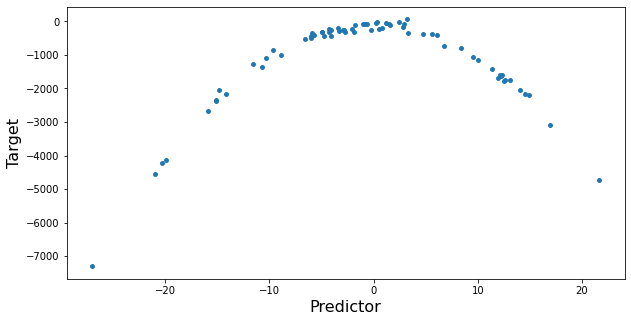

In [11]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# for calculating mean_squared error
from sklearn.metrics import mean_squared_error

# creating a dataset with curvilinear relationship
x=10*np.random.normal(0,1,70)
y=10*(-x**2)+np.random.normal(-100,100,70)

# plotting dataset
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

In [16]:
# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# Training Model
lm=LinearRegression()
lm.fit(x.reshape(-1,1),y.reshape(-1,1)) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

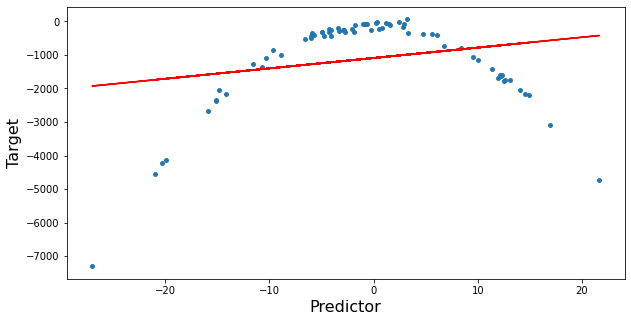

In [17]:
y_pred=lm.predict(x.reshape(-1,1))

# plotting predictions
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

In [18]:
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,y_pred)))

RMSE for Linear Regression=> 1327.5821732214079


We can see that the straight line is unable to capture the patterns in the data. This is an example of under-fitting.To overcome under-fitting, we need to increase the complexity of the model.

This is still considered to be linear model as the coefficients/weights associated with the features are still linear. x² is only a feature. However the curve that we are fitting is quadratic in nature.

To convert the original features into their higher order terms we will use the PolynomialFeatures class provided by scikit-learn. Next, we train the model using Linear Regression.
Now, let’s try polynomial regression.

The implementation of polynomial regression is a two-step process. First, we transform our data into a polynomial using the PolynomialFeatures function from sklearn and then use linear regression to fit the parameters:

We can automate this process using pipelines. Pipelines can be created using Pipeline from sklearn.

Let’s create a pipeline for performing polynomial regression:

In [19]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.reshape(-1,1),y.reshape(-1,1))

Pipeline(memory=None,
         steps=[('polynomial',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('modal',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Here, I have taken a 2-degree polynomial. We can choose the degree of polynomial based on the relationship between target and predictor. The 1-degree polynomial is a simple linear regression; therefore, the value of degree must be greater than 1.

With the increasing degree of the polynomial, the complexity of the model also increases. Therefore, the value of n must be chosen precisely. If this value is low, then the model won’t be able to fit the data properly and if high, the model will overfit the data easily.

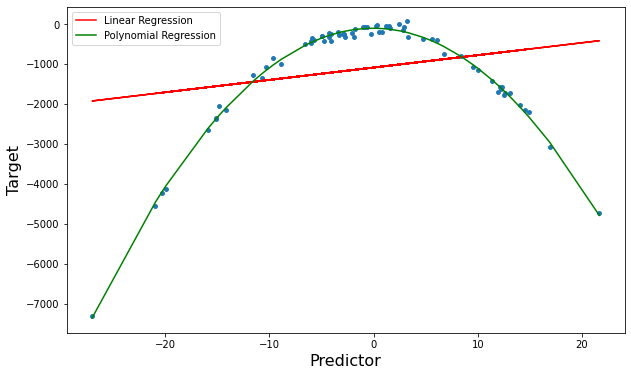

In [20]:
poly_pred=pipe.predict(x.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()

In [21]:
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))

RMSE for Polynomial Regression=> 2012.0456497531009
